# DEEP LEARNING WITH PYTHON
## _FROM TABULAR TO MULTIMEDIA_

### UniFr Winter School in Data Analytics & Machine Learning
Fribourg, 14-16 February 2024

with [Christian Kauth](https://www.linkedin.com/in/ckauth/)

# Libraries

In [1]:
from google.colab import drive
import os as os
from requests import get

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers

# Data

In [2]:
def download_save(url, filename):
  res = get(url)
  if res.status_code != 200:
    print(f"Couldn't fetch data from {url}")
  else:
    csv_file = open(filename, 'wb')
    csv_file.write(res.content)
    csv_file.close()

## Wine

In [ ]:
%%html
<iframe src="https://archive.ics.uci.edu/ml/datasets/wine+quality" width="1100" height="600"></iframe>

In [3]:
download_save('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
              'wine.csv')

In [4]:
df_wine = pd.read_csv('wine.csv', sep=';')
print(df_wine.shape)
df_wine.sample(10)

(1599, 12)


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1592            6.3             0.510         0.13             2.3      0.076   
1274            7.8             0.580         0.13             2.1      0.102   
661             7.5             0.420         0.31             1.6      0.080   
540             9.2             0.590         0.24             3.3      0.101   
889            10.7             0.900         0.34             6.6      0.112   
593             9.9             0.490         0.58             3.5      0.094   
1373            7.7             0.750         0.27             3.8      0.110   
1530            6.6             0.440         0.09             2.2      0.063   
29              7.8             0.645         0.00             2.0      0.082   
625             6.8             0.690         0.00             5.6      0.124   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1592                 29.0                  40.0  0.99574  3.42       0.75   
1274                 17.0                  36.0  0.99440  3.24       0.53   
661                  15.0                  42.0  0.99780  3.31       0.64   
540                  20.0                  47.0  0.99880  3.26       0.67   
889                  23.0                  99.0  1.00289  3.22       0.68   
593                   9.0                  43.0  1.00040  3.29       0.58   
1373                 34.0                  89.0  0.99664  3.24       0.45   
1530                  9.0                  18.0  0.99444  3.42       0.69   
29                    8.0                  16.0  0.99640  3.38       0.59   
625                  21.0                  58.0  0.99970  3.46       0.72   

      alcohol  quality  
1592     11.0        6  
1274     11.2        6  
661       9.0        5  
540       9.6        5  
889       9.3        5  
593       9.0        5  
1373      9.3        5  
1530     11.3        6  
29        9.8        6  
625      10.2        5

## Diabetes
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [5]:
download_save('https://gist.githubusercontent.com/ktisha/c21e73a1bd1700294ef790c56c8aec1f/raw/819b69b5736821ccee93d05b51de0510bea00294/pima-indians-diabetes.csv',
              'pima.csv')

In [6]:
df_pima = pd.read_csv('pima.csv',
                      header=8,
                      names = ['preg', 'gluc', 'pres', 'skin' ,'insu', 'bmi', 'pedi', 'age', 'class'])
df_pima.sample(10)

preg  gluc  pres  skin  insu   bmi   pedi  age  class
373     2   105    58    40    94  34.9  0.225   25      0
766     1   126    60     0     0  30.1  0.349   47      1
159    17   163    72    41   114  40.9  0.817   47      1
635    13   104    72     0     0  31.2  0.465   38      1
228     4   197    70    39   744  36.7  2.329   31      0
11     10   168    74     0     0  38.0  0.537   34      1
86     13   106    72    54     0  36.6  0.178   45      0
28     13   145    82    19   110  22.2  0.245   57      0
337     5   115    76     0     0  31.2  0.343   44      1
88     15   136    70    32   110  37.1  0.153   43      1

# Stochastic Gradient Descent
- Sample some training data, run it through the network to make predictions. (that is the stochastic element)

- Measure the loss between the predictions and the true values.

- Adjust the weights in a direction that makes the loss smaller.

- Repeat until the loss is small enough / does not decrease anymore.


In [ ]:
%%html
<img src="https://i.imgur.com/rFI1tIk.gif"/ width="100%">

## Learning Rate

- _Adam_ is a great general-purpose optimizer with an adaptive learning rate and sensible defaults.

## Batch Size
- On how many samples do you train at each iteration?

## ❓ Exercise

1. Create the follwoing multilayer perceptron (MLP) to solve the wine quality regression problem:
- Hidden layer with 512 units and ReLu activation
- Hidden layer with 512 units and ReLu activation
- Hidden layer with 512 units and ReLu activation
- Output layer without activation

2. Try small (e.g. 16) and large (e.g. 256) batch sizes. What do you observe?

3. Try small (e.g. 0.001) and large (e.g. 0.9) learning rates. What do you observe?

In [7]:
X = df_wine.copy()
y = X.pop('quality')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

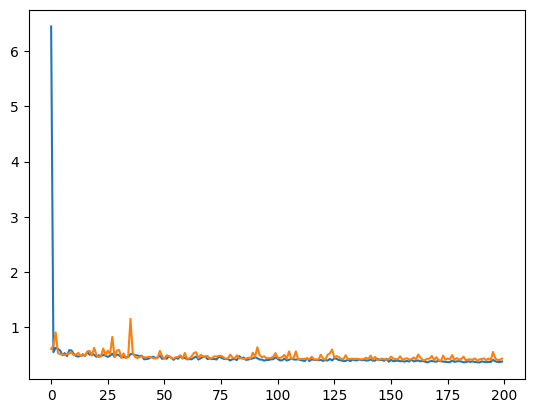

In [14]:
#scafold
from tensorflow.keras import optimizers

input_shape = X.shape[1]

model = keras.Sequential([
    layers.Dense(units=512,
                 input_shape=[input_shape],
                 activation="relu"),
    *[layers.Dense(units=units, activation="relu") for units in [512, 512]],
    layers.Dense(units=1, activation=None)
])

adam = optimizers.Adam(learning_rate=0.001)

model.compile(loss=losses.MeanSquaredError(), optimizer=adam) # weights reset only when you compile.

history = model.fit(X_train,
                    y_train,
                    validation_data=[X_test, y_test],
                    batch_size=16,
                    epochs=200,
                    verbose=0)

df_history = pd.DataFrame(history.history)
plt.plot(df_history['loss'])
plt.plot(df_history['val_loss']) # blue is performance on training, orange on the test data

10/10 [==============================] - 0s 2ms/step
Mean squared error on Test set: 0.46374903600984324


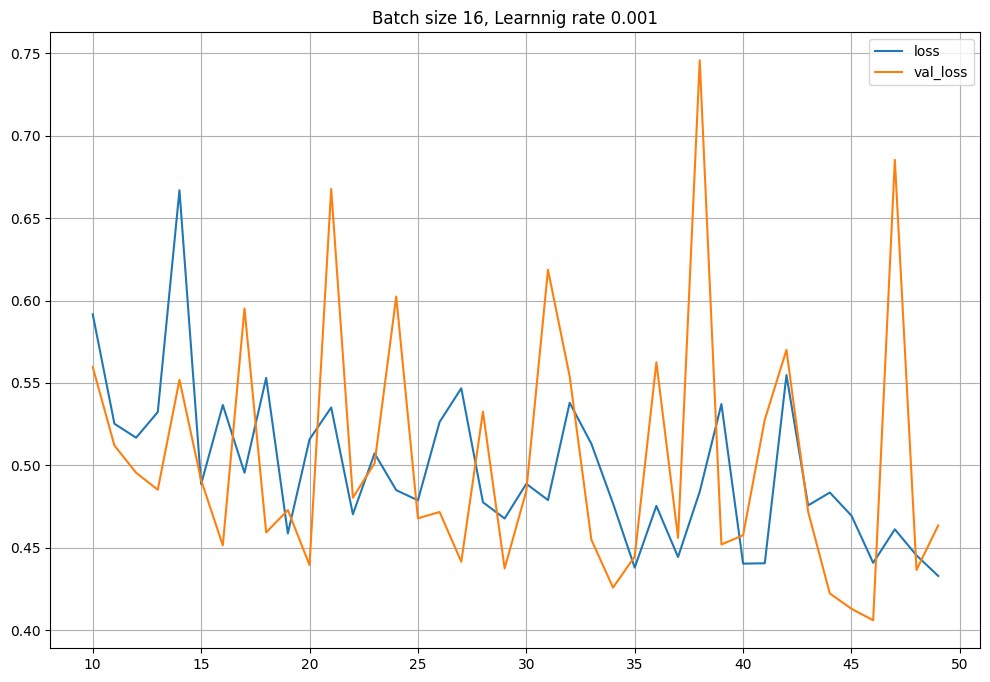

10/10 [==============================] - 0s 3ms/step
Mean squared error on Test set: 99.36778699441807


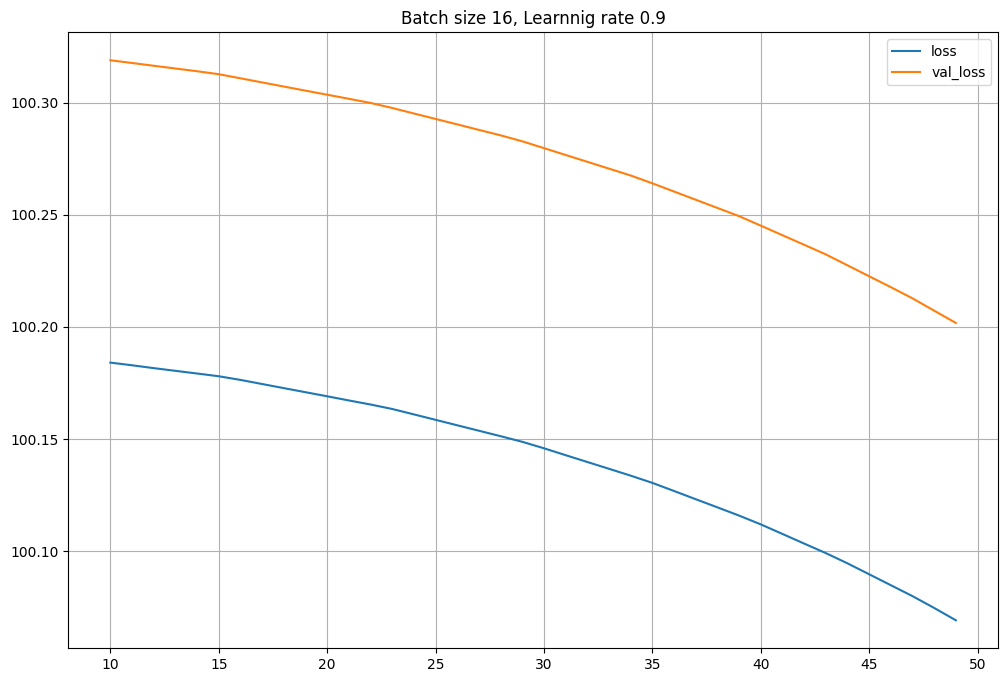

10/10 [==============================] - 0s 2ms/step
Mean squared error on Test set: 0.487935269258066


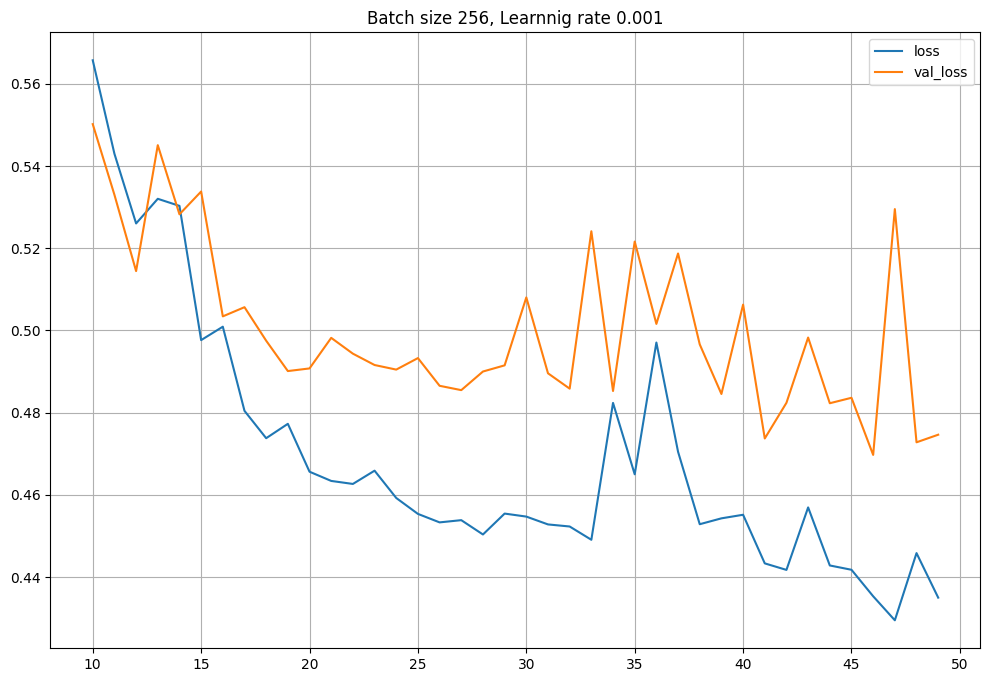

10/10 [==============================] - 0s 2ms/step
Mean squared error on Test set: 94.12200322482735


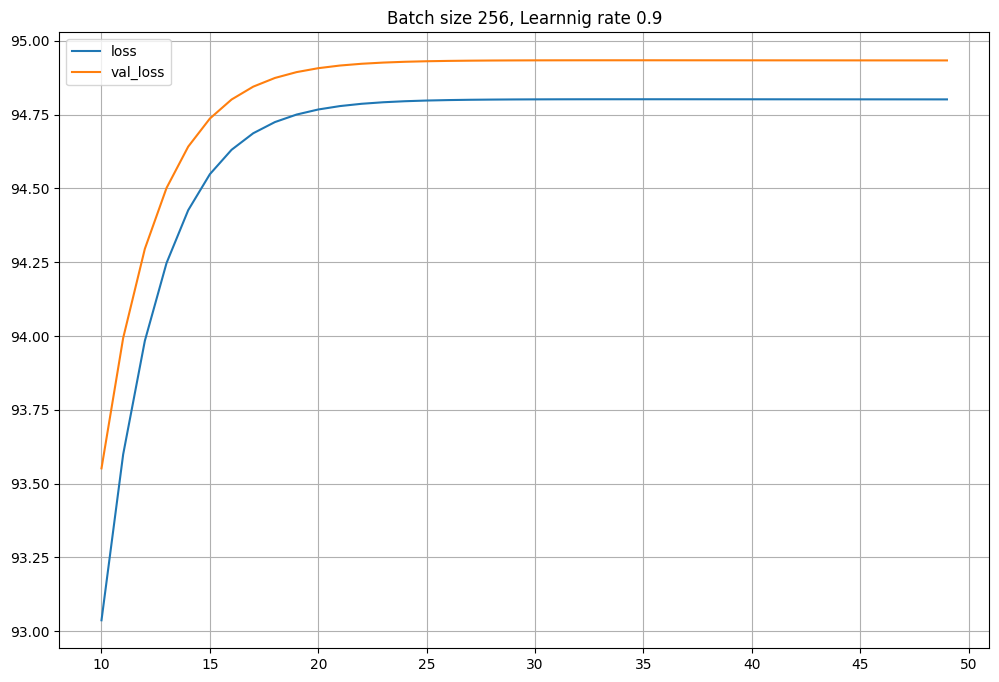

In [15]:
#@title Solution
for batch_size in [16, 256]:
  for learning_rate in [0.001, 0.9]:

    model = keras.Sequential([
      layers.Dense(units=512, activation='relu', input_shape=[11], name='input'),
      layers.Dense(units=512, activation='relu', name='hidden2'),
      layers.Dense(units=512, activation='relu', name='hidden3'),
      layers.Dense(units=1, activation=None, name='quality')
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss=losses.MeanSquaredError())

    history = model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=50,
              batch_size=batch_size,
              verbose=0)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print("Mean squared error on Test set:", mse)

    df_history = pd.DataFrame(history.history)

    fig, ax = plt.subplots(figsize=(12, 8))
    cut_first_n = 10 # use this parameter to cut noise from your plot
    df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax)
    plt.grid(which='both')
    plt.title(f'Batch size {batch_size}, Learnnig rate {learning_rate}')
    plt.show()

Not converging/not converging fast enough --> more layers

Loss is too noisy --> increase batch size. Rule of thumb: square root of the number of observations

Error is diverging --> smaller learning rate

# Over- and Underfitting
- Signal
- Noise

In [16]:
X = df_pima.copy()
y = X.pop('class')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Epoch 1/200
2/2 [==============================] - 2s 197ms/step - loss: 5.9808 - binary_accuracy: 0.4745 - val_loss: 8.5831 - val_binary_accuracy: 0.4797
Epoch 2/200
2/2 [==============================] - 0s 29ms/step - loss: 4.9400 - binary_accuracy: 0.5927 - val_loss: 2.4995 - val_binary_accuracy: 0.6098
Epoch 3/200
2/2 [==============================] - 0s 28ms/step - loss: 2.7370 - binary_accuracy: 0.5743 - val_loss: 3.2562 - val_binary_accuracy: 0.3659
Epoch 4/200
2/2 [==============================] - 0s 27ms/step - loss: 2.7508 - binary_accuracy: 0.4684 - val_loss: 1.7376 - val_binary_accuracy: 0.6016
Epoch 5/200
2/2 [==============================] - 0s 28ms/step - loss: 1.3553 - binary_accuracy: 0.6701 - val_loss: 2.0467 - val_binary_accuracy: 0.4959
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 1.6595 - binary_accuracy: 0.6090 - val_loss: 1.5177 - val_binary_accuracy: 0.5122
Epoch 7/200
2/2 [==============================] - 0s 29ms/step - loss: 1.2

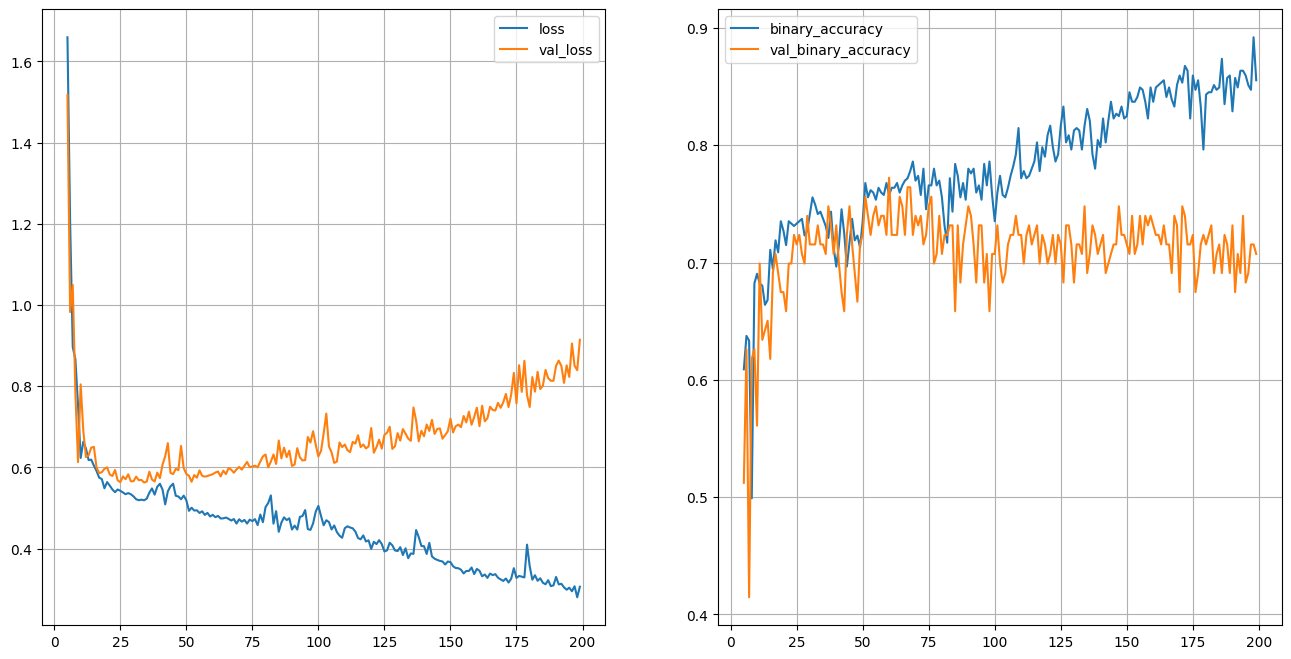

CPU times: user 10.3 s, sys: 631 ms, total: 11 s
Wall time: 11.5 s


In [17]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

Accuracy

## Early Stopping

In [18]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,    # minimium amount of change to count as an improvement
    patience=20,        # how many epochs to wait before stopping. So if min_delta is not crossed, how many epochs should we keep trying to get an improvement
    restore_best_weights=True,
)

Epoch 1/200
2/2 [==============================] - 2s 204ms/step - loss: 14.6950 - binary_accuracy: 0.4868 - val_loss: 20.3183 - val_binary_accuracy: 0.6423
Epoch 2/200
2/2 [==============================] - 0s 36ms/step - loss: 15.9818 - binary_accuracy: 0.6497 - val_loss: 3.0465 - val_binary_accuracy: 0.6423
Epoch 3/200
2/2 [==============================] - 0s 47ms/step - loss: 4.1373 - binary_accuracy: 0.5010 - val_loss: 7.2342 - val_binary_accuracy: 0.3577
Epoch 4/200
2/2 [==============================] - 0s 34ms/step - loss: 5.4177 - binary_accuracy: 0.3503 - val_loss: 1.7799 - val_binary_accuracy: 0.4797
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 1.5900 - binary_accuracy: 0.6130 - val_loss: 2.6107 - val_binary_accuracy: 0.6423
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 2.4832 - binary_accuracy: 0.6497 - val_loss: 1.7907 - val_binary_accuracy: 0.6423
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 

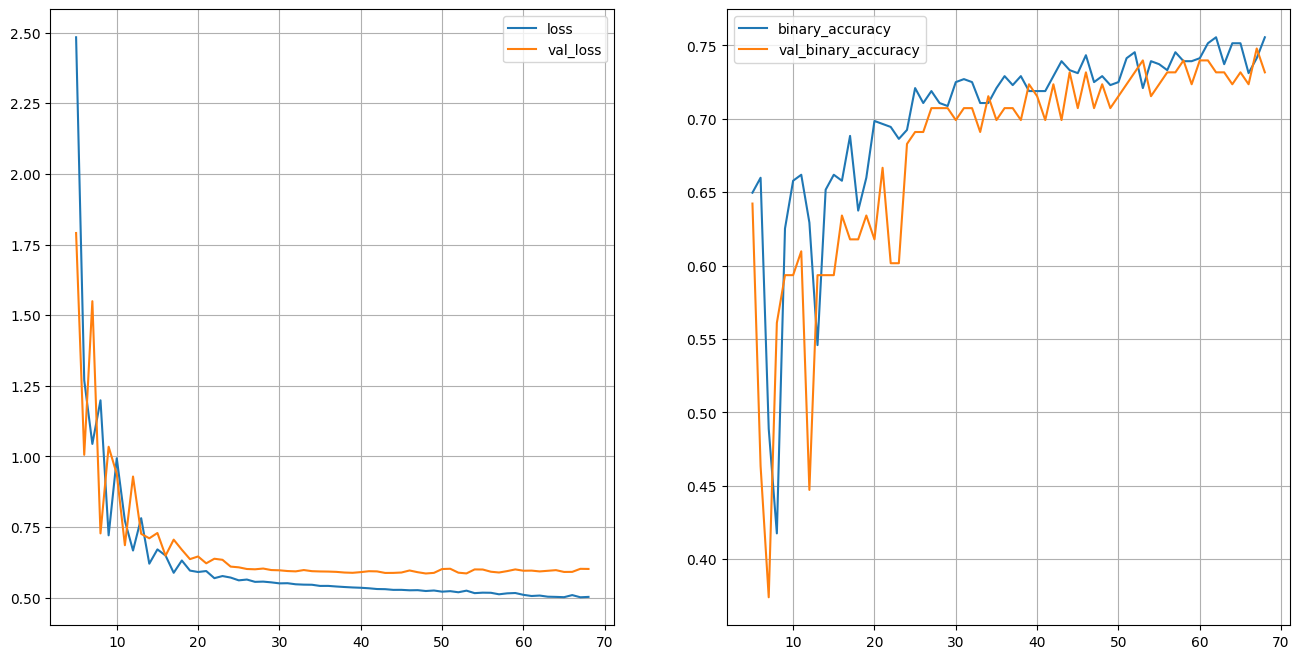

CPU times: user 4.82 s, sys: 338 ms, total: 5.16 s
Wall time: 6.35 s


In [19]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1,
          callbacks=[early_stopping])

predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

## Dropout
Idea: we sometimes grey out some nodes in the backwards propagation algorithm.
- Spurious patterns
- Conspiracy of weights
- Ensemble of networks

In [ ]:
%%html
<img src="https://i.imgur.com/a86utxY.gif" width="60%"/>

Epoch 1/200
2/2 [==============================] - 5s 342ms/step - loss: 11.2240 - binary_accuracy: 0.4990 - val_loss: 11.9946 - val_binary_accuracy: 0.3577
Epoch 2/200
2/2 [==============================] - 0s 106ms/step - loss: 6.9540 - binary_accuracy: 0.4684 - val_loss: 4.8788 - val_binary_accuracy: 0.6423
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 4.9870 - binary_accuracy: 0.6641

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 122ms/step - loss: 5.5188 - binary_accuracy: 0.6477 - val_loss: 3.1745 - val_binary_accuracy: 0.6423
Epoch 4/200
2/2 [==============================] - 0s 123ms/step - loss: 2.8477 - binary_accuracy: 0.6334 - val_loss: 1.8799 - val_binary_accuracy: 0.3577
Epoch 5/200
2/2 [==============================] - 0s 58ms/step - loss: 1.9618 - binary_accuracy: 0.4827 - val_loss: 2.8955 - val_binary_accuracy: 0.3577
Epoch 6/200
2/2 [==============================] - 0s 102ms/step - loss: 2.1787 - binary_accuracy: 0.4379 - val_loss: 1.1555 - val_binary_accuracy: 0.4878
Epoch 7/200
2/2 [==============================] - 0s 111ms/step - loss: 1.1834 - binary_accuracy: 0.5723 - val_loss: 0.9867 - val_binary_accuracy: 0.5935
Epoch 8/200
2/2 [==============================] - 0s 44ms/step - loss: 1.3032 - binary_accuracy: 0.6354 - val_loss: 1.0622 - val_binary_accuracy: 0.6260
Epoch 9/200
2/2 [==============================] - 0s 111ms/step - loss: 1.1547 - bi

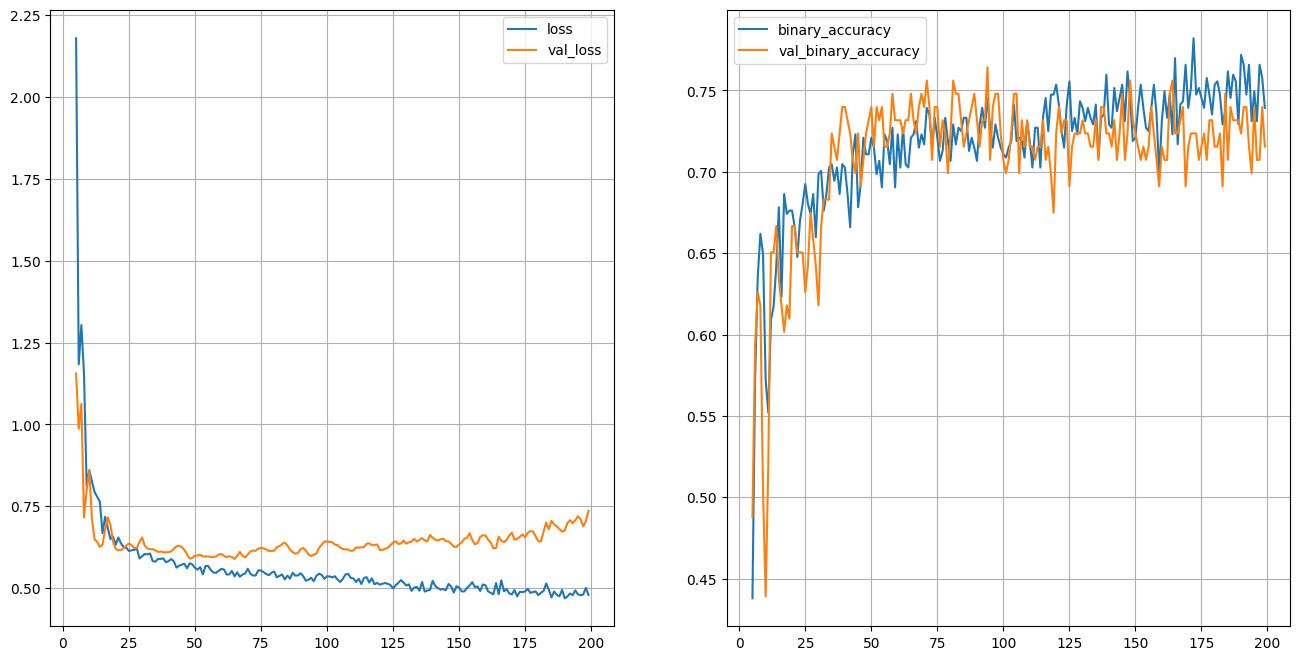

CPU times: user 14.8 s, sys: 854 ms, total: 15.7 s
Wall time: 23.4 s


In [20]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4), # 40% of these neurons don't fire
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

# store the best weights
checkpoint_filepath = 'weights.h5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                   monitor='val_loss',
                                                   mode='min',
                                                   save_best_only=True) # saves the model if it is the best in the series

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1,
          callbacks=[model_checkpoint])

model.load_weights(checkpoint_filepath)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

## Batch Normalization

$ y = \frac{x-E(x)}{\sqrt{Var(x)+\epsilon}}\cdot \gamma + \beta$

We don't actually know what the beta and gamma are, but why don't we try to learn them!
- Correct slow or unstable training.
- If it's good to normalize data at the input, it may also help to normalize it within the network.
- Batch normalization is a trainable coordinate rescaling of the input.

<img src="https://gaoxiangluo.github.io/2021/08/01/Group-Norm-Batch-Norm-Instance-Norm-which-is-better/figure6.png" width="1000px"/>

Gradient does not work well when you have too many parameters and the activation function is sigmoid. However, with relu, the derivative is constant after 0. Vanishing gradient was resolved through relu, when it was discovered in 2014!

In [21]:
X.shape

(768, 8)

Epoch 1/200
2/2 [==============================] - 2s 246ms/step - loss: 0.8611 - binary_accuracy: 0.5825 - val_loss: 8.7052 - val_binary_accuracy: 0.3577
Epoch 2/200
2/2 [==============================] - 0s 64ms/step - loss: 0.8287 - binary_accuracy: 0.6090 - val_loss: 8.3241 - val_binary_accuracy: 0.3577
Epoch 3/200
2/2 [==============================] - 0s 29ms/step - loss: 0.7488 - binary_accuracy: 0.6558 - val_loss: 11.2625 - val_binary_accuracy: 0.3577
Epoch 4/200
2/2 [==============================] - 0s 28ms/step - loss: 0.6876 - binary_accuracy: 0.6864 - val_loss: 11.4442 - val_binary_accuracy: 0.3577
Epoch 5/200


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 28ms/step - loss: 0.7066 - binary_accuracy: 0.6741 - val_loss: 10.2617 - val_binary_accuracy: 0.3577
Epoch 6/200
2/2 [==============================] - 0s 28ms/step - loss: 0.6823 - binary_accuracy: 0.7006 - val_loss: 10.1769 - val_binary_accuracy: 0.3577
Epoch 7/200
2/2 [==============================] - 0s 30ms/step - loss: 0.7219 - binary_accuracy: 0.6640 - val_loss: 10.5088 - val_binary_accuracy: 0.3577
Epoch 8/200
2/2 [==============================] - 0s 27ms/step - loss: 0.7091 - binary_accuracy: 0.6843 - val_loss: 10.2336 - val_binary_accuracy: 0.3577
Epoch 9/200
2/2 [==============================] - 0s 28ms/step - loss: 0.6019 - binary_accuracy: 0.7230 - val_loss: 9.2728 - val_binary_accuracy: 0.3577
Epoch 10/200
2/2 [==============================] - 0s 28ms/step - loss: 0.6313 - binary_accuracy: 0.7271 - val_loss: 8.3315 - val_binary_accuracy: 0.3577
Epoch 11/200
2/2 [==============================] - 0s 64ms/step - loss: 0.6006 - b

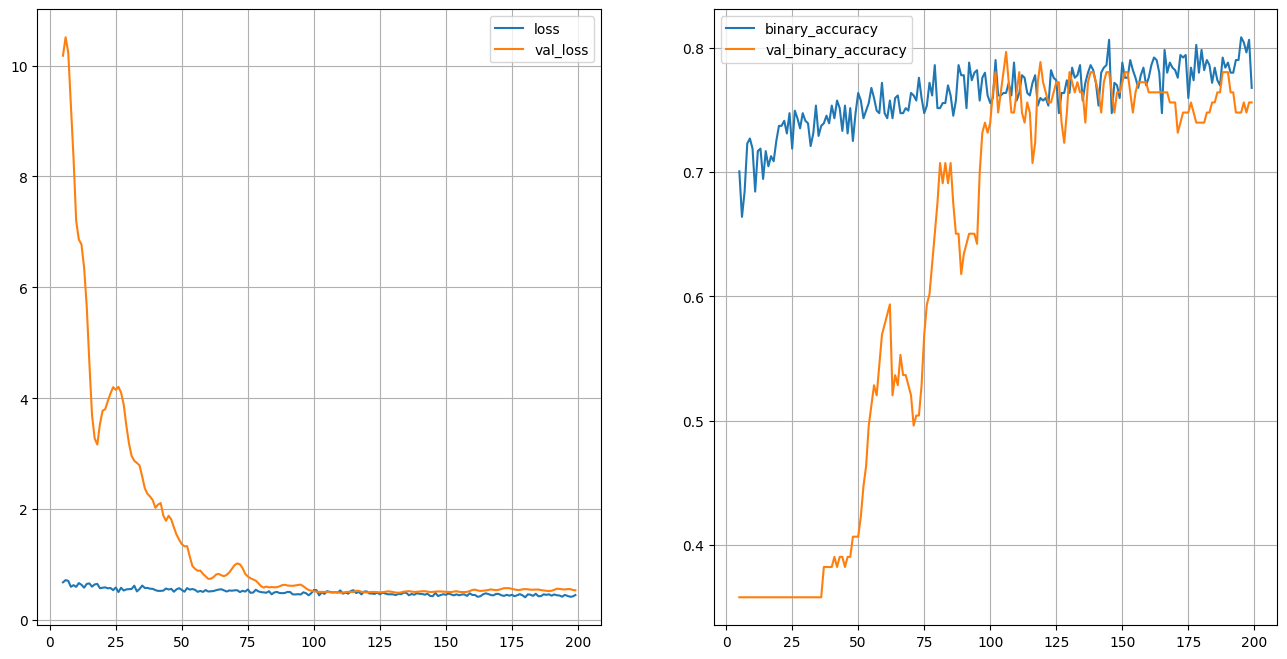

CPU times: user 12.1 s, sys: 1.11 s, total: 13.2 s
Wall time: 13.4 s


In [22]:
%%time
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(512, activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.4),
    layers.Dense(1, activation='sigmoid'),
  ])

model.compile(optimizer=keras.optimizers.Adam(),
              loss=losses.BinaryCrossentropy(),
              metrics=[keras.metrics.BinaryAccuracy()])

# store the best weights
checkpoint_filepath = 'weights.h5'
model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                   monitor='val_loss',
                                                   mode='min',
                                                   save_best_only=True)

history = model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=200,
          batch_size=256,
          verbose=1,
          callbacks=[model_checkpoint])

model.load_weights(checkpoint_filepath)
predictions = model.predict(X_test)
acc = accuracy_score(y_test, np.round(predictions, decimals=0))
print("Accuracy Test set:", acc)

df_history = pd.DataFrame(history.history)

fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 5 # use this parameter to cut noise from your plot
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

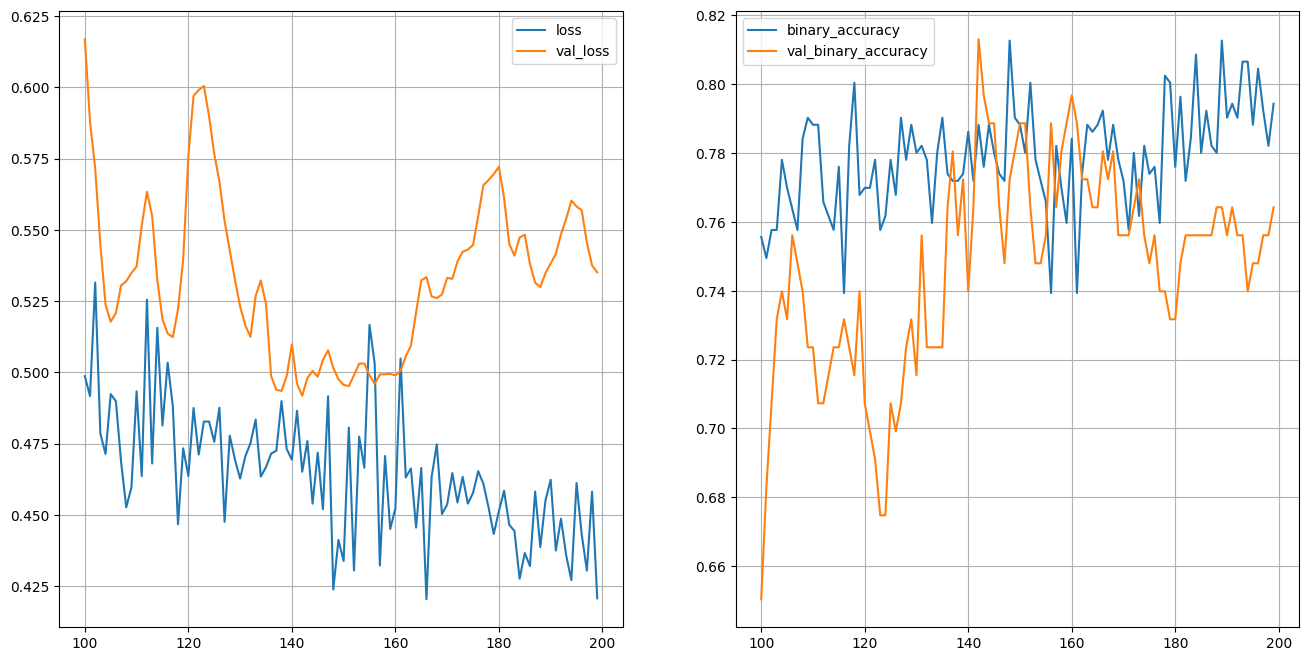

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
cut_first_n = 100 # use this parameter to cut noise from your plot
df_history.loc[cut_first_n:, ['loss', 'val_loss']].plot(ax=ax[0])
df_history.loc[cut_first_n:, ['binary_accuracy', 'val_binary_accuracy']].plot(ax=ax[1])
ax[0].grid(which='both')
ax[1].grid(which='both')
plt.show()

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 512)               4608      
                                                                 
 dense_14 (Dense)            (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_15 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                      

# ❓ Exercise 🎵💃🏻🕺🏻

Let's predict the popularity of tracks on Spotify, based on its:
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms
- playlist_genre

## Data

In [23]:
download_save('https://kauthentechstorage.blob.core.windows.net/datasets/spotify.xls',
              'spotify.csv')

In [24]:
df_spotify = pd.read_csv('spotify.csv')
print(df_spotify.shape)
df_spotify.sample(10)

(32833, 23)


track_id  \
24385  7x7kYJwduClF3I0ozJpNsZ   
24195  4OqE9LCGi3JuT1bALpabFX   
22197  3zEKbhms2GDJQXaOLZZjAH   
5970   1mMCe8c6iNVLu6fzJl2tIi   
18954  2oeyvFG0mFFDHUxhPVObNk   
19420  2FqoR7diymD1Eh7cVb3DMg   
10435  6Sf5gfWy6LzGR9H78Gu4Ss   
22511  1yLyf9SqDF7qGxHb9OQGST   
27015  15avYgGiZCIT8PYtcRH7VU   
24697  2DLfVnmabQqX3g3dnfvBe2   

                                              track_name       track_artist  \
24385                    Loungin (Who Do Ya Luv) - Remix          LL Cool J   
24195  (There You Go) Tellin' Me No Again - 2007 Rema...        Keith Sweat   
22197       Body Count (feat. Normani & Kehlani) - Remix       Jessie Reyez   
5970                                                Ptak              Deemz   
18954                                       Flow Natural  Tito "El Bambino"   
19420                                Algo Me Gusta De Ti     Wisin & Yandel   
10435                                        Cómo Dímelo       Nicki Nicole   
22511                                    I Need An Angel     Ruben Studdard   
27015                                             Punk'd      Haus of Panda   
24697  Every Time I Close My Eyes (with Mariah Carey,...           Babyface   

       track_popularity          track_album_id  \
24385                 1  3fNwYcwgUi4n1jmQ6ERvxK   
24195                38  6GXk2hxl4q5GoPHarlUet8   
22197                 0  73BcOzJue1Xq7I6ZIxJdwC   
5970                 61  5jSCbb7NmnsaWzxgChLrJU   
18954                61  0GERlfOuy87BuTAcwuO5Kb   
19420                69  6tOFRRXAis3nniv1wG6Nae   
10435                44  5KdLGjhWQgwor8l5DsSZgR   
22511                29  1zc9Bicds4da6pzuAsE8A4   
27015                53  1jCbqLUP6aK4ZtN0RIxLqu   
24697                41  5CcLqG8xiW1riFm1x6uy65   

                                   track_album_name track_album_release_date  \
24385                    Mr. Smith (Deluxe Edition)               1995-11-20   
24195       The Best of Keith Sweat: Make You Sweat               2004-01-13   
22197  Body Count (feat. Normani & Kehlani) [Remix]               2018-08-24   
5970                                           Ptak               2019-12-16   
18954                               Top Of The Line               2006-01-01   
19420                                       Líderes               2012-01-01   
10435                                     Recuerdos               2019-11-08   
22511                               I Need An Angel               2004-10-18   
27015                                        Punk'd               2019-05-17   
24697                        The Essential Babyface               2003-06-10   

                                           playlist_name  \
24385  Swingbeat (old skool), New Jack Swing, R&B, Hi...   
24195              New Jack Swing/ R&B Hits: 1987 - 2002   
22197                              PROJECT: Contemporary   
5970                                   Generacja Hip Hop   
18954                                 Reggaeton Classics   
19420                                    REGGAETON VIEJO   
10435                                 Trapperz Argentina   
22511                                             Gospel   
27015                                         Nasty Bits   
24697  Back in the day - R&B, New Jack Swing, Swingbe...   

                  playlist_id playlist_genre  ... key  loudness  mode  \
24385  3krpccUV68nBGAQbvHEZDC            r&b  ...   7    -9.839     1   
24195  4sji14lrB5bgcr51lPALYH            r&b  ...   3    -7.142     0   
22197  6HaCi9bqaiuSZEDfCEmwyo            r&b  ...  11    -4.515     0   
5970   37i9dQZF1DWXJnyndhASBe            rap  ...   6    -6.581     0   
18954  37i9dQZF1DX8SfyqmSFDwe          latin  ...   0    -5.498     1   
19420  31hG19URdBvLEpQWKFYfdD          latin  ...  11    -5.296     0   
10435  37i9dQZF1DWXrVH01e3PIE            rap  ...   5    -8.372     0   
22511  0pItJZBDZFvgAOdFnSITnJ            r&b  ...  11    -4.680     1   
27015  37i9dQZF1DX2VvACCrg

In [ ]:
df_spotify.head(3)

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   

   track_artist  track_popularity          track_album_id  \
0    Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1      Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2  Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  

[3 rows x 23 columns]

In [ ]:
df_spotify.describe(include='all').transpose()

count unique                        top  freq  \
track_id                    32833  28356     7BKLCZ1jbUBVqRi2FVlTVw    10   
track_name                  32828  23449                     Poison    22   
track_artist                32828  10692              Martin Garrix   161   
track_popularity          32833.0    NaN                        NaN   NaN   
track_album_id              32833  22545     5L1xcowSxwzFUSJzvyMp48    42   
track_album_name            32828  19743              Greatest Hits   139   
track_album_release_date    32833   4530                 2020-01-10   270   
playlist_name               32833    449            Indie Poptimism   308   
playlist_id                 32833    471     4JkkvMpVl4lSioqQjeAL0q   247   
playlist_genre              32833      6                        edm  6043   
playlist_subgenre           32833     24  progressive electro house  1809   
danceability              32833.0    NaN                        NaN   NaN   
energy                    32833.0    NaN                        NaN   NaN   
key                       32833.0    NaN                        NaN   NaN   
loudness                  32833.0    NaN                        NaN   NaN   
mode                      32833.0    NaN                        NaN   NaN   
speechiness               32833.0    NaN                        NaN   NaN   
acousticness              32833.0    NaN                        NaN   NaN   
instrumentalness          32833.0    NaN                        NaN   NaN   
liveness                  32833.0    NaN                        NaN   NaN   
valence                   32833.0    NaN                        NaN   NaN   
tempo                     32833.0    NaN                        NaN   NaN   
duration_ms               32833.0    NaN                        NaN   NaN   

                                   mean           std       min       25%  \
track_id                            NaN           NaN       NaN       NaN   
track_name                          NaN           NaN       NaN       NaN   
track_artist                        NaN           NaN       NaN       NaN   
track_popularity              42.477081     24.984074       0.0      24.0   
track_album_id                      NaN           NaN       NaN       NaN   
track_album_name                    NaN           NaN       NaN       NaN   
track_album_release_date            NaN           NaN       NaN       NaN   
playlist_name                       NaN           NaN       NaN       NaN   
playlist_id                         NaN           NaN       NaN       NaN   
playlist_genre                      NaN           NaN       NaN       NaN   
playlist_subgenre                   NaN           NaN       NaN       NaN   
danceability                    0.65485      0.145085       0.0     0.563   
energy                         0.698619       0.18091  0.000175     0.581   
key                            5.374471      3.611657       0.0       2.0   
loudness                      -6.719499      2.988436   -46.448    -8.171   
mode                           0.565711      0.495671       0.0       0.0   
speechiness                    0.107068      0.101314       0.0     0.041   
acousticness                   0.175334      0.219633       0.0    0.0151   
instrumentalness               0.084747       0.22423       0.0       0.0   
liveness                       0.190176      0.154317       0.0    0.0927   
valence                        0.510561      0.233146       0.0     0.331   
tempo                        120.881132     26.903624       0.0     99.96   
duration_ms               225799.811622  59834.006182    4000.0  187819.0   

                               50%       75%       max  
track_id                       NaN       NaN       NaN  
track_name                     NaN       NaN       NaN  
track_artist                   NaN       NaN       NaN  
track_popularity              45.0      62.0     100.0  
track_album_id                 NaN       NaN 

## Train, Test and Validation Sets

In [25]:
X = df_spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

# Select features
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

# To prevent signal leakage, we do a "grouped" split to keep all of an artist's songs in either the trianing or the test split
def group_split(X, y, group, train_size=0.8):
  splitter = GroupShuffleSplit(train_size=train_size, random_state=10)
  train, test = next(splitter.split(X, y, groups=group))
  return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Train, validation and test splits
X_train, X_test, y_train, y_test = group_split(X, y, artists)
X_train, X_valid, y_train, y_valid = group_split(X_train, y_train, artists.loc[X_train.index], train_size=0.9)

# Encode & Preprocess features
preprocessor = make_column_transformer((StandardScaler(), features_num),
                                       (OneHotEncoder(), features_cat))

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test = preprocessor.transform(X_test)

input_shape = [X_train.shape[1]]

print(f"Train shape: X:{X_train.shape}, y:{y_train.shape}")
print(f"Valid shape: X:{X_valid.shape}, y:{y_valid.shape}")
print(f"Test shape: X:{X_test.shape}, y:{y_test.shape}")

Train shape: X:(23742, 18), y:(23742,)
Valid shape: X:(2592, 18), y:(2592,)
Test shape: X:(6494, 18), y:(6494,)


 ## Models

 Predict track popularity based on whichever features are the most important.

In [29]:
23742**(1/2)

154.08439246075508

### Linear Model

In [26]:
model = keras.Sequential([
    layers.Dense(units=512, input_shape=input_shape, activation="relu"),
    *[layers.Dense(units=units, activation="relu") for units in [512, 512, 512]],
    layers.Dense(units=1, activation=None)
])

print(model.summary())

model.compile(optimizer='adam',
              loss='mae')

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=154,
    epochs=200,
    verbose=0)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Minimum Test Loss: {mae:.4f}")

fig, ax = plt.subplots(figsize=(12, 8))
history_df = pd.DataFrame(history.history)
history_df.loc[10:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               9728      
                                                                 
 dense_45 (Dense)            (None, 512)               262656    
                                                                 
 dense_46 (Dense)            (None, 512)               262656    
                                                                 
 dense_47 (Dense)            (None, 512)               262656    
                                                                 
 dense_48 (Dense)            (None, 1)                 513       
                                                                 
Total params: 798209 (3.04 MB)
Trainable params: 798209 (3.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


KeyboardInterrupt: 

❓ Does the linear model under- or overfit?

### More Capacity
❓ Add more capacity to the network:
- 1 hidden layer with 128 units and relu activation
- 1 hidden layer with 64 units and relu activation

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               2432      
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10753 (42.00 KB)
Trainable params: 10753 (42.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
203/203 [==============================] - 0s 2ms/step
Minimum Test Loss: 20.4476


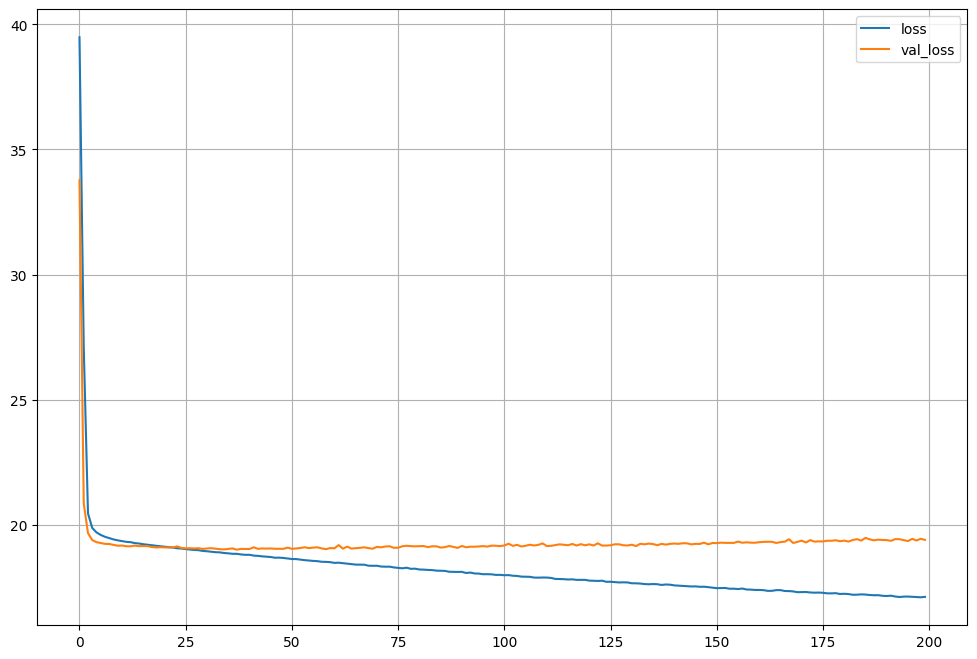

In [ ]:
#@title Solution
model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation=None),
])

print(model.summary())

model.compile(optimizer='adam',
              loss='mae')

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    verbose=0)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Minimum Test Loss: {mae:.4f}")

fig, ax = plt.subplots(figsize=(12, 8))
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

❓
- Has the under/overfitting situation changed?
- Has the result improved?

### Early Stopping
- To your previous network, add an early stopping callback that waits 30 epochs for any improvement in validation loss and keeps the weights with the best loss.

❓
- Has the under/overfitting situation changed?
- Has the result improved?

### Dropout
- Add 50% dropout afer each hidden layer of your previous network

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 128)               2432      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_54 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10753 (42.00 KB)
Trainable params: 10753 (42.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
203/203 [===

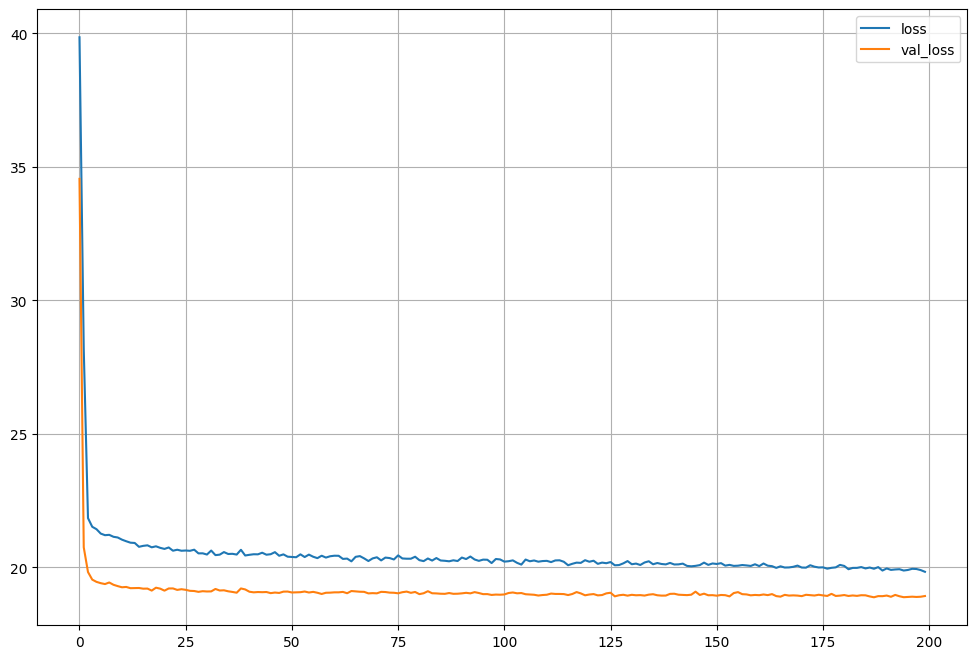

In [36]:
#@title Solution
model = keras.Sequential([
    layers.Dense(units=128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation=None),
])
print(model.summary())

model.compile(optimizer='adam',
              loss='mae')

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    verbose=0)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Minimum Test Loss: {mae:.4f}")

fig, ax = plt.subplots(figsize=(12, 8))
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

❓
- Has the under/overfitting situation changed?
- Has the result improved?

### Batch Normalization
- Use your previous network on the data without scaling the numeric features.
- Remove the early stopping rule
- Plot the results starting at epoch 50

- Then add batch normalization

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2432      
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                     

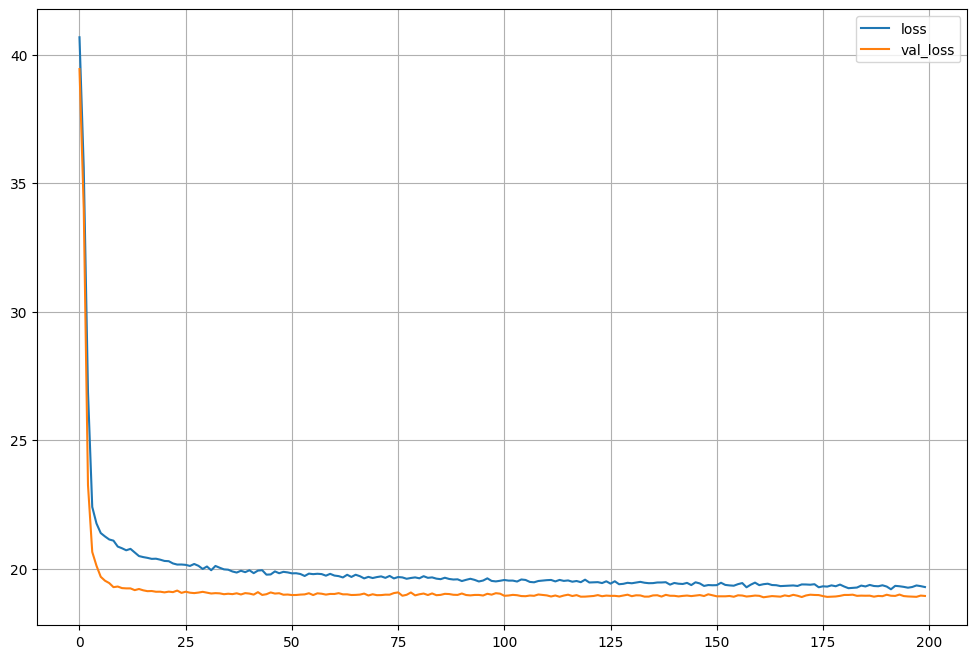

In [ ]:
#@title Solution
model = keras.Sequential([
    layers.Dense(units=128, input_shape=input_shape, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation=None),
])

print(model.summary())

model.compile(optimizer='adam',
              loss='mae')

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    verbose=0)

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f"Minimum Test Loss: {mae:.4f}")

fig, ax = plt.subplots(figsize=(12, 8))
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

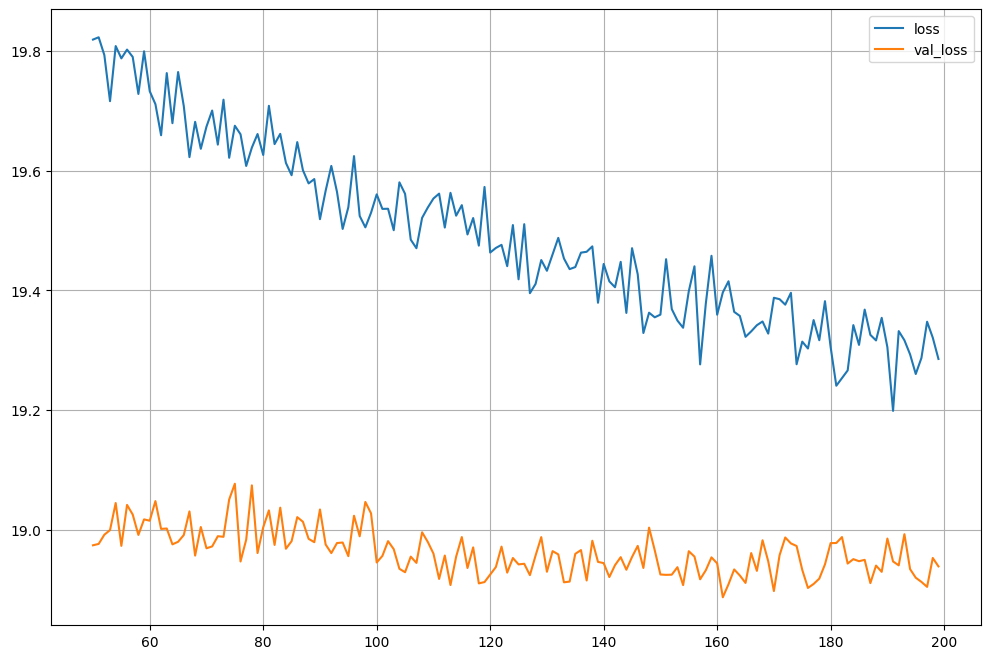

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
history_df = pd.DataFrame(history.history)
history_df.loc[50:, ['loss', 'val_loss']].plot(ax=ax)
plt.grid(which='both')
plt.show()

In [ ]:
features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer((StandardScaler(), features_num),
                                       (OneHotEncoder(), features_cat))

❓
- Has the under/overfitting situation changed?
- Has the result improved?

## Wrap into KerasRegressor

### Train-Test Split

In [37]:
X = df_spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

def group_split(X, y, group, train_size=0.8):
  splitter = GroupShuffleSplit(train_size=train_size, random_state=10)
  train, test = next(splitter.split(X, y, groups=group))
  return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

# Train, validation and test splits
X_train, X_test, y_train, y_test = group_split(X, y, artists)
X_train, X_valid, y_train, y_valid = group_split(X_train, y_train, artists.loc[X_train.index], train_size=0.9)

input_shape = [X_train.shape[1]]

print(f"Train shape: X:{X_train.shape}, y:{y_train.shape}")
print(f"Valid shape: X:{X_valid.shape}, y:{y_valid.shape}")
print(f"Test shape: X:{X_test.shape}, y:{y_test.shape}")

print(input_shape)

Train shape: X:(23742, 22), y:(23742,)
Valid shape: X:(2592, 22), y:(2592,)
Test shape: X:(6494, 22), y:(6494,)
[22]


### Neural Net 🧠

In [30]:
def mlp(input_shape):
  model = keras.Sequential([
    layers.Dense(units=128, input_shape=input_shape, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation=None),
  ])

  model.compile(loss=losses.MeanAbsoluteError(),
                optimizer=optimizers.Adam()
                )

  return model

In [31]:
model = mlp([22])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 128)               2944      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 65        
                                                     

### Preprocessing 🛠️

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

### Training 💪🏻

In [33]:
!pip install -qq scikeras

In [38]:
from sklearn.metrics import mean_absolute_error
from scikeras.wrappers import KerasRegressor

mlp_model = KerasRegressor(model=mlp,
                           input_shape=(18,),
                           batch_size=512,
                           epochs=20,
                           verbose=1)

model = Pipeline([('preprocessor', preprocessor),
                  ('regressor', mlp_model)])

model.fit(X_train, y_train)
          #regressor__validation_data=(X_valid, y_valid))

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(mae)

Epoch 1/20
47/47 [==============================] - 3s 6ms/step - loss: 40.2801
Epoch 2/20
47/47 [==============================] - 0s 6ms/step - loss: 34.6083
Epoch 3/20
47/47 [==============================] - 0s 6ms/step - loss: 26.2236
Epoch 4/20
47/47 [==============================] - 0s 6ms/step - loss: 22.6312
Epoch 5/20
47/47 [==============================] - 0s 6ms/step - loss: 21.5692
Epoch 6/20
47/47 [==============================] - 0s 6ms/step - loss: 21.3430
Epoch 7/20
47/47 [==============================] - 0s 7ms/step - loss: 21.2011
Epoch 8/20
47/47 [==============================] - 0s 6ms/step - loss: 21.1341
Epoch 9/20
47/47 [==============================] - 0s 7ms/step - loss: 21.0271
Epoch 10/20
47/47 [==============================] - 0s 6ms/step - loss: 20.8402
Epoch 11/20
47/47 [==============================] - 0s 8ms/step - loss: 20.8121
Epoch 12/20
47/47 [==============================] - 0s 8ms/step - loss: 20.6680
Epoch 13/20
47/47 [==================

In [39]:
def assess_model(model):
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  mae = mean_absolute_error(y_test, predictions)
  return mae

In [40]:
mlp_model = KerasRegressor(model=mlp,
                           input_shape=(18,),
                           batch_size=512,
                           epochs=20,
                           verbose=0)

model = Pipeline([('preprocessor', preprocessor),
                  ('regressor', mlp_model)])


assess_model(model)

20.49749257500663

### Challenge 🏆

In [47]:
input_shape = X_train.shape[1]


def mlp(input_shape):
  model = keras.Sequential([
    layers.Dense(units=128, input_shape=input_shape, activation='relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation=None),
  ])

  model.compile(loss=losses.MeanAbsoluteError(),
                  optimizer=optimizers.Adam()
                  )

  return model

mlp_model = KerasRegressor(model=mlp,
                           input_shape=(18,),
                           batch_size=154,
                           epochs=100,
                           verbose=0)

model = Pipeline([('preprocessor', preprocessor),
                  ('regressor', mlp_model)])

model.fit(X_train, y_train)
          #regressor__validation_data=(X_valid, y_valid))

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(mae)

20.115919276535017


In [45]:
from sklearn.linear_model import LinearRegression

model = Pipeline([('preprocessor', preprocessor),
                  ('regressor', LinearRegression())])

assess_model(model)

20.776311744912224

Gradient boosting actually outperforms NN with tabular data! However, with more features such as image data, NN will be better.

# UP NEXT
[Convolutional Neural Networks](https://colab.research.google.com/drive/1LOekDo_U_nRf37a__ZkfGdwg50JNwInu?usp=sharing)